In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [264]:
dataFrame = pd.read_csv("Cost_of_Living_Index_by_Country_2024.csv") 

# Display the first 5 rows of the dataset

In [265]:
dataFrame.head() 

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


# Check for NULL values in the dataset

In [266]:
dataFrame.isnull().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [267]:
Turkiye = dataFrame[dataFrame ['Country']=='Turkey']
Turkiye

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
69,70,Turkey,37.4,13.2,25.8,37.6,30.7,49.0


# Group by Cost of Living
(sort_values)

In [268]:
groups = dataFrame.groupby('Cost of Living Index')['Country'].apply(list).reset_index()
groups

,Cost of Living Index,Country
0,18.8,[Pakistan]
1,20.4,[Libya]
2,21.0,[Egypt]
3,21.2,[India]
4,22.5,[Bangladesh]
...,...,...
102,76.6,[Barbados]
103,76.7,[Singapore]
104,83.0,[Iceland]
105,85.0,[Bahamas]


# Histogram of Cost of Living Index

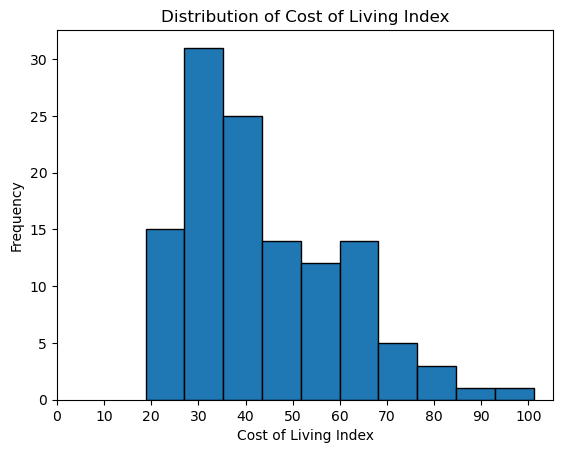

In [269]:
plt.hist(dataFrame['Cost of Living Index'], bins=10, edgecolor='black')
plt.title('Distribution of Cost of Living Index')
plt.xlabel('Cost of Living Index')
plt.ylabel('Frequency')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100'])
plt.show()

# Box Plot of Cost of Living Index

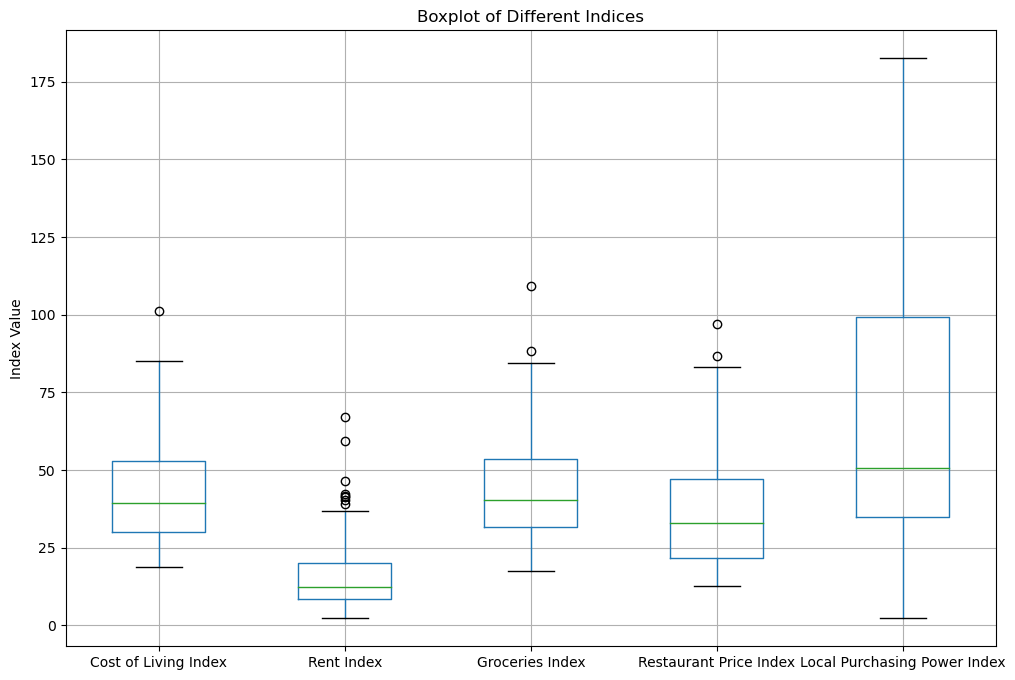

In [270]:
dataFrame[['Cost of Living Index', 'Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']].boxplot(figsize=(12, 8))
plt.title('Boxplot of Different Indices')
plt.ylabel('Index Value')
plt.show()

# Scatter Plot of Cost of Living vs Rent Index

<Axes: xlabel='Cost of Living Index'>

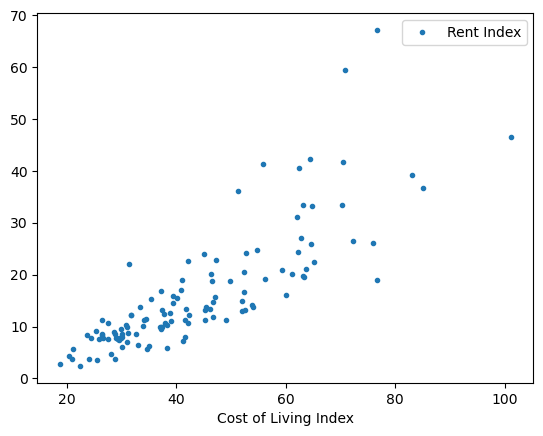

In [271]:
dataFrame.plot(x='Cost of Living Index', y='Rent Index', style=".")

# Bar Plot of Top 25 Countries by Cost of Living Index

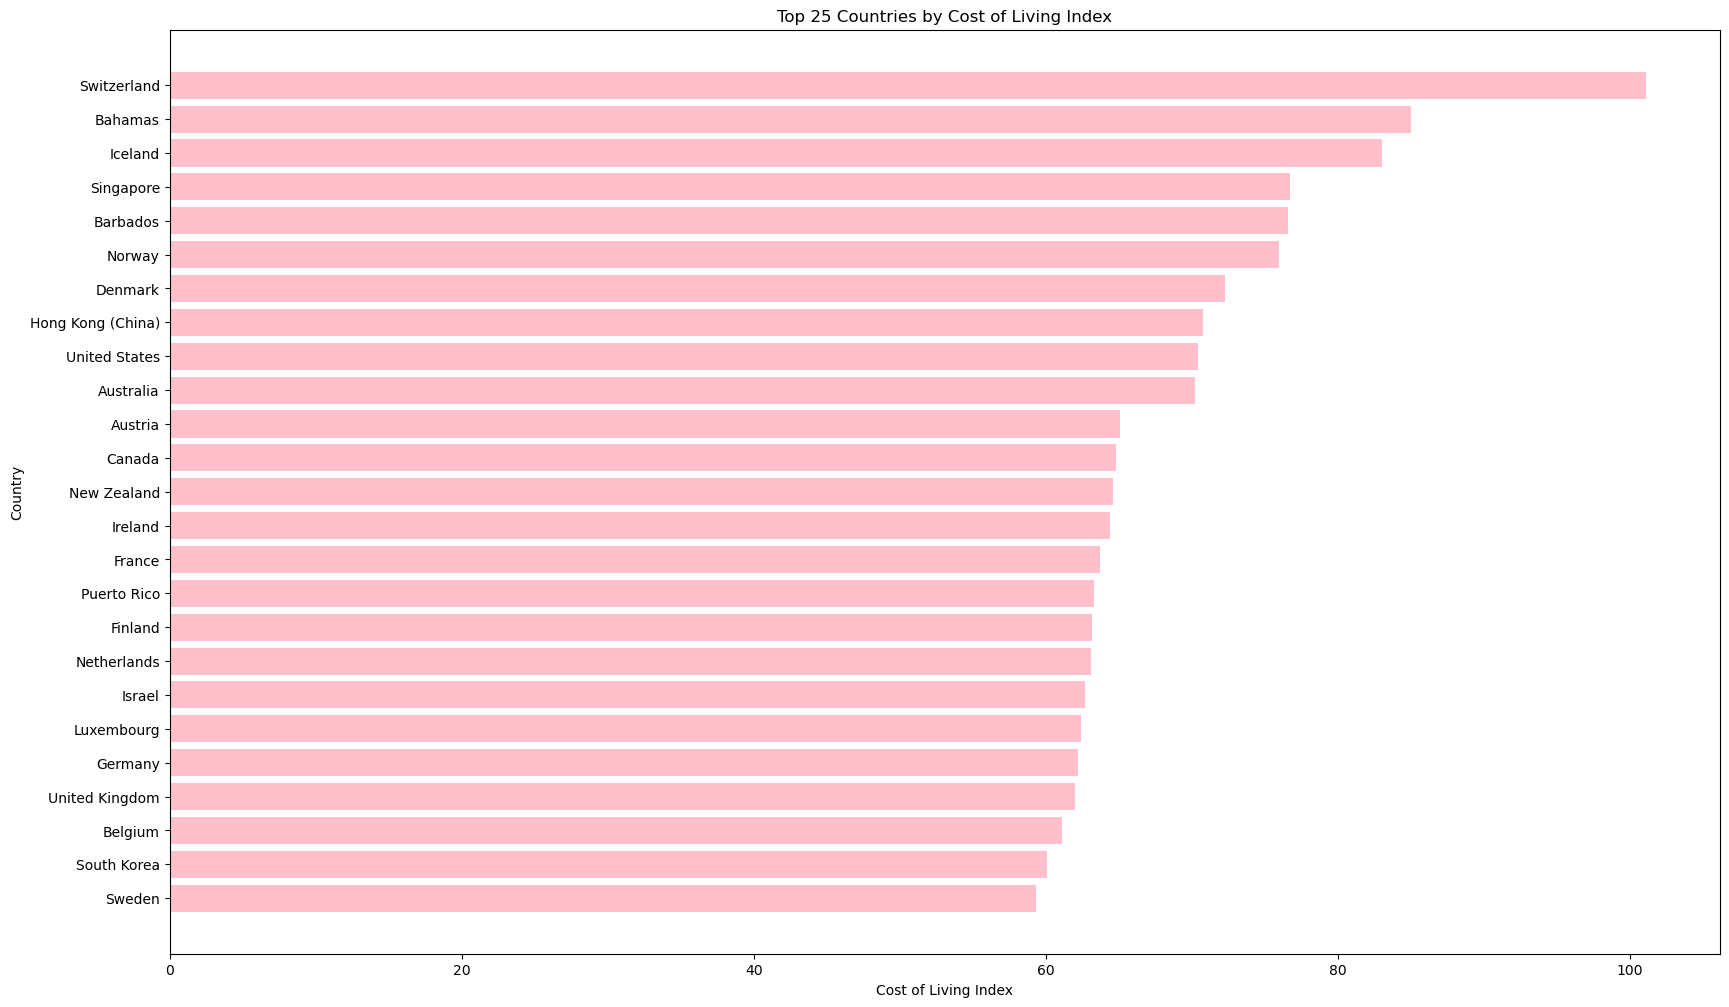

In [272]:
top_25_countries = dataFrame.nlargest(25, 'Cost of Living Index')

# Bar plot
plt.figure(figsize=(20, 12))
plt.barh(top_25_countries['Country'], top_25_countries['Cost of Living Index'], color='pink')
plt.title('Top 25 Countries by Cost of Living Index')
plt.xlabel('Cost of Living Index')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()

# Determination of countries with equal living costs

In [273]:
filtered_groups = groups[groups['Country'].apply(len) > 1]
filtered_groups.reset_index()

,index,Cost of Living Index,Country
0,11,26.4,"[Iran, Uzbekistan, Belarus]"
1,13,27.6,"[Bolivia, Kyrgyzstan]"
2,21,29.5,"[Morocco, Kosovo (Disputed Territory)]"
3,22,30.0,"[Malaysia, Peru]"
4,24,30.2,"[Brazil, Kenya]"
5,26,31.0,"[Philippines, Russia]"
6,29,31.7,"[Kazakhstan, China]"
7,41,37.3,"[Cambodia, Cameroon]"
8,46,38.3,"[Venezuela, Bulgaria]"
9,58,42.1,"[Kuwait, Albania]"


# Remove the rank property

In [274]:
df_cleaned = dataFrame.drop(columns=['Rank'])

# comparing countries with the same cost of living

In [275]:
selected_cities = df_cleaned[df_cleaned['Cost of Living Index'] == 30.2]

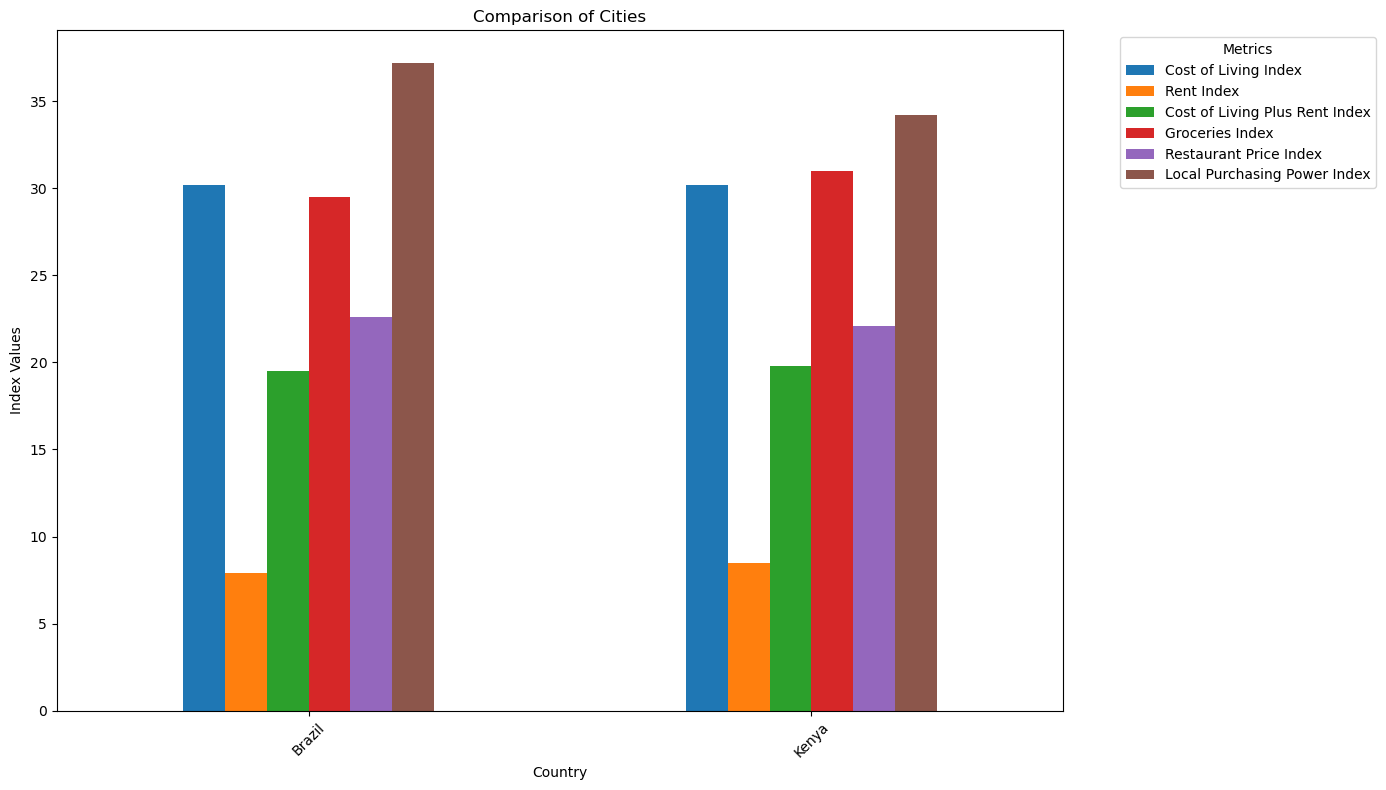

In [276]:
# Plot all columns for comparison
fig, ax = plt.subplots(figsize=(14, 8))
selected_cities.plot(kind='bar', x='Country', ax=ax)
ax.set_title('Comparison of Cities')
ax.set_xlabel('Country')
ax.set_ylabel('Index Values')
ax.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()


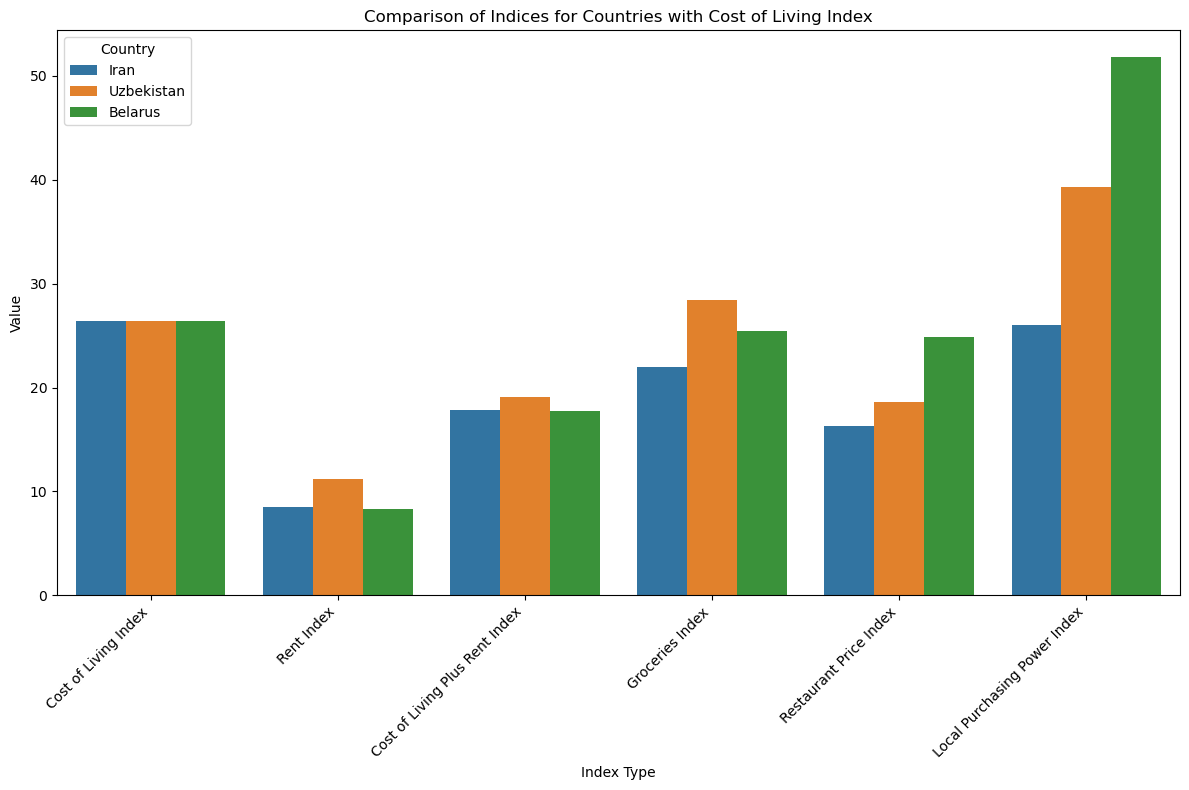

In [277]:
df_filtered = df_cleaned[df_cleaned['Cost of Living Index'] == 26.4]
df_melted = df_filtered.melt(id_vars='Country', var_name='Index Type', value_name='Value')
plt.figure(figsize=(12, 8))
sbn.barplot(x='Index Type', y='Value', hue='Country', data=df_melted)
plt.title('Comparison of Indices for Countries with Cost of Living Index')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()